## Visualizations

In [202]:
import pandas as pd
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.preprocessing import MinMaxScaler
import wordcloud
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
from sklearn import preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [203]:
by_isrc = pd.read_csv('by_isrc_oldest.csv')

In [204]:
by_isrc.head().T

,0,1,2,3,4
isrc,AEA040700577,AEA040700578,AEA040700579,AEA040700580,AEA040700581
genres,"['j-pop', 'jazz', 'pop']","['groove', 'j-pop', 'jazz', 'pop']","['groove', 'j-pop', 'jazz', 'pop']","['groove', 'j-pop', 'jazz', 'pop']","['groove', 'j-pop', 'jazz', 'pop', 'pop']"
name,Bala Wala Chi,Houdou Nisbi,Nafs Al Sheghlat,Yalla Kichou Barra,Ma Tfel
artists,Ziad Rahbani,Ziad Rahbani,Ziad Rahbani,Ziad Rahbani,Ziad Rahbani
album,Houdou Nisbi,Houdou Nisbi,Houdou Nisbi,Houdou Nisbi,Houdou Nisbi
release_date,1985-01-01,1985-01-01,1985-01-01,1985-01-01,1985-01-01
release_date_precision,day,day,day,day,day
uri,spotify:track:0fylgLeNObjVvwhd8caHqX,spotify:track:0yMFpBNCYXqwwOAg23bC8a,spotify:track:6G8l1kI8QlTD0UDIak5F8H,spotify:track:21g76Lq5Jg4QvfTDvi4PlH,spotify:track:0pKxrkFh8fxPKpkO29MYmi
spotify_id,0fylgLeNObjVvwhd8caHqX,0yMFpBNCYXqwwOAg23bC8a,6G8l1kI8QlTD0UDIak5F8H,21g76Lq5Jg4QvfTDvi4PlH,0pKxrkFh8fxPKpkO29MYmi
chart_power,NaN,NaN,NaN,NaN,NaN


In [205]:
remove_genres = ["classical", "jazz", "folk", "french", "turkish", "gospel", "samba", "piano", "mpb", "sertanejo", "pagode", "sleep", "forro", "malay", "anime", 
                 "j-idol", "comedy", "mandopop", "cantopop", "show-tunes", "emo", "romance", "j-dance", "chill", "world-music", "iranian", "idm", "metalcore", 
                 "hardstyle", "opera", "k-pop", "j-pop", "j-rock", "happy"]

## Find the biggest genres

In [206]:
df = pd.read_csv('data.csv')
df.drop_duplicates(inplace=True)

In [207]:
df.head(5).T

,0,1,2,3,4
name,That's No Way To Get Along,I Got A Problem,The Highway Is Like A Woman,Alabama Blues,Get Away Blues
artists,Robert Wilkins,Albert Collins,Albert Collins,Robert Wilkins,Robert Wilkins
album,The Original Rolling Stone,Frostbite,Frostbite,The Original Rolling Stone,The Original Rolling Stone
release_date,1980-01-01,1980-02-05,1980-02-05,1980-01-01,1980-01-01
release_date_precision,day,day,day,day,day
chart_power,NaN,NaN,NaN,NaN,NaN
spotify_id,5JKdsNzhJGpoaKBFZpOKQ3,6e2PhVePvqe7w4VNBTslef,4Qzcy6jU0yeck7IuCqGWSi,42zUiYaKltE7jFWb57fXAW,0hCrfp9WImVO6KWI30O1sM
uri,spotify:track:5JKdsNzhJGpoaKBFZpOKQ3,spotify:track:6e2PhVePvqe7w4VNBTslef,spotify:track:4Qzcy6jU0yeck7IuCqGWSi,spotify:track:42zUiYaKltE7jFWb57fXAW,spotify:track:0hCrfp9WImVO6KWI30O1sM
popularity,22,15,16,11,4
danceability,0.427,0.76,0.751,0.49,0.629


In [208]:
ct = pd.crosstab(df['isrc'], df['genres'])
# ct.reset_index(inplace=True)
ct = ct.applymap(lambda x: 1 if x > 1 else x)
ct.reset_index(inplace=True)

In [209]:
# drop genres of the DataFrame
ct = ct.set_index('isrc').drop(columns=remove_genres)

In [210]:
# find all songs which are not assigned to genre anymore and remove them
print(f'Shape before removing songs. ct: {ct.shape}; df: {df.shape}')
remove_songs = ct[ct.T.sum() == 0].index.to_list()
ct.drop(index=remove_songs, inplace=True)
df.set_index('isrc', inplace=True)
df.drop(index=remove_songs, inplace=True)
df.reset_index(inplace=True)
print(f'Shape after removing songs. ct: {ct.shape}; df: {df.shape}')

Shape before removing songs. ct: (427265, 76); df: (863828, 24)
Shape after removing songs. ct: (316490, 76); df: (712299, 24)


In [211]:
ct_sum = ct.sum()

In [212]:
ct_sum_df = pd.DataFrame(ct_sum)

In [213]:
#ct_sum_df.drop(index='isrc', inplace=True)

In [214]:
ct_sum_df.rename(columns={0: 'count'}, inplace=True)

In [215]:
sorted_genres = ct_sum_df.sort_values(by='count', ascending=False).index.to_list()

In [216]:
ct_sum_df.sort_values(by='count', ascending=False)[0:50]

,count
genres,
pop,118762
rock,93935
german,37752
punk,24275
metal,15761
country,15546
blues,12211
hard-rock,11659
soul,11099


Biggest genres is pop.

Count occurences of the top genres per year

In [217]:
by_isrc_year = by_isrc.copy()
by_isrc_year = by_isrc_year[['year', 'isrc']]
by_isrc_year = by_isrc_year.merge(ct, on=['isrc'], how='left')
by_isrc_year.set_index('year', inplace=True)

genres_by_year = by_isrc_year[sorted_genres[:50]] #used for wordcloud
genres_by_year = genres_by_year.groupby('year').sum()
genres_by_year.index = genres_by_year.index.astype(str)

by_isrc_year = by_isrc_year[sorted_genres[:10]]
by_isrc_year = by_isrc_year.groupby('year').sum()
by_isrc_year.index = by_isrc_year.index.astype(str)

## Development of features over the years

In [218]:
df = by_isrc.copy()

In [219]:
df.head(2).T

,0,1
isrc,AEA040700577,AEA040700578
genres,"['j-pop', 'jazz', 'pop']","['groove', 'j-pop', 'jazz', 'pop']"
name,Bala Wala Chi,Houdou Nisbi
artists,Ziad Rahbani,Ziad Rahbani
album,Houdou Nisbi,Houdou Nisbi
release_date,1985-01-01,1985-01-01
release_date_precision,day,day
uri,spotify:track:0fylgLeNObjVvwhd8caHqX,spotify:track:0yMFpBNCYXqwwOAg23bC8a
spotify_id,0fylgLeNObjVvwhd8caHqX,0yMFpBNCYXqwwOAg23bC8a
chart_power,NaN,NaN


In [220]:
songs_per_year = df.copy()
songs_per_year = songs_per_year[['year', 'popularity', 'danceability', 'energy',
                                 'key', 'loudness', 'mode', 'speechiness',
                                 'acousticness', 'instrumentalness', 'liveness',
                                 'valence', 'tempo', 'duration_ms',
                                 'time_signature']]
songs_per_year['count'] = -1
songs_per_year = songs_per_year.groupby("year").agg({
    "popularity": 'mean',
    'danceability': 'mean', 
    'energy': 'mean',
    'key': 'mean', 
    'loudness': 'mean', 
    'mode': 'mean', 
    'speechiness': 'mean',
    'acousticness': 'mean', 
    'instrumentalness': 'mean', 
    'liveness': 'mean',
    'valence': 'mean', 
    'tempo': 'mean', 
    'duration_ms': 'mean',
    'time_signature': 'mean',
    'count': 'count'
})
songs_per_year.reset_index(inplace=True)

In [221]:
songs_per_year['duration_min'] = songs_per_year['duration_ms'] / (1000 * 60)

In [222]:
songs_per_year.head(10)

,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,count,duration_min
0,1980,6.932103,0.499812,0.485525,5.110445,-12.356653,0.703678,0.065002,0.521989,0.169238,0.220967,0.543921,118.259726,247998.407916,3.830705,35701,4.133307
1,1981,7.112235,0.501099,0.488608,5.164865,-12.559169,0.699801,0.068562,0.511205,0.175626,0.222056,0.541400,118.658803,244699.429525,3.832266,33118,4.078324
2,1982,7.169674,0.503354,0.486809,5.193071,-12.731032,0.698866,0.077487,0.507867,0.175538,0.221643,0.531725,118.373840,247427.740306,3.835526,31926,4.123796
3,1983,7.047373,0.495283,0.471217,5.186754,-13.219378,0.687359,0.065915,0.516330,0.193409,0.217015,0.519328,117.784345,251536.693328,3.830344,34682,4.192278
4,1984,7.346757,0.491733,0.477950,5.207964,-13.240091,0.674151,0.064660,0.512988,0.188150,0.222164,0.507015,117.703958,249410.156878,3.837688,37545,4.156836
5,1985,7.163784,0.488324,0.470269,5.156586,-13.452114,0.684718,0.061279,0.523986,0.203092,0.215998,0.506548,117.184774,255583.193630,3.833289,37928,4.259720
6,1986,6.717974,0.474060,0.456206,5.176228,-13.903385,0.686777,0.062151,0.543401,0.219038,0.211249,0.486566,116.233584,256471.286957,3.829770,42184,4.274521
7,1987,6.634905,0.469873,0.443336,5.180522,-14.392384,0.692525,0.061195,0.553069,0.238068,0.207147,0.473718,116.127546,259072.147444,3.819021,50365,4.317869
8,1988,6.138412,0.464916,0.428971,5.169508,-14.948866,0.687010,0.062721,0.565367,0.260287,0.210766,0.472932,115.397637,262048.766115,3.810233,58593,4.367479
9,1989,6.067652,0.467819,0.418770,5.191640,-15.100176,0.691717,0.064646,0.572174,0.254533,0.206904,0.466538,115.049823,261012.425156,3.807026,65216,4.350207


In [223]:
songs_per_year.columns

Index(['year', 'popularity', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'count',
       'duration_min'],
      dtype='object')

In [224]:
songs_per_year = songs_per_year.astype({'year': str})

In [225]:
"""alt.Chart(songs_per_year).mark_bar().encode(
    alt.X("year"),
    alt.Y("count")
)"""

'alt.Chart(songs_per_year).mark_bar().encode(\n    alt.X("year"),\n    alt.Y("count")\n)'

In [226]:
features = ['popularity', 'danceability', 'energy',
            'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'duration_min',
            'time_signature']

In [227]:
songs_per_year.head()

,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,count,duration_min
0,1980,6.932103,0.499812,0.485525,5.110445,-12.356653,0.703678,0.065002,0.521989,0.169238,0.220967,0.543921,118.259726,247998.407916,3.830705,35701,4.133307
1,1981,7.112235,0.501099,0.488608,5.164865,-12.559169,0.699801,0.068562,0.511205,0.175626,0.222056,0.541400,118.658803,244699.429525,3.832266,33118,4.078324
2,1982,7.169674,0.503354,0.486809,5.193071,-12.731032,0.698866,0.077487,0.507867,0.175538,0.221643,0.531725,118.373840,247427.740306,3.835526,31926,4.123796
3,1983,7.047373,0.495283,0.471217,5.186754,-13.219378,0.687359,0.065915,0.516330,0.193409,0.217015,0.519328,117.784345,251536.693328,3.830344,34682,4.192278
4,1984,7.346757,0.491733,0.477950,5.207964,-13.240091,0.674151,0.064660,0.512988,0.188150,0.222164,0.507015,117.703958,249410.156878,3.837688,37545,4.156836


In [228]:
"""# Create the initial scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=songs_per_year['year'],
    y=songs_per_year['duration_ms'],
    #mode='markers',
    name='Duration (ms)'
))

# Define the dropdown menu options
dropdown_options = [
    {'label': 'Duration (ms)', 'value': 'duration_ms'},
    {'label': 'Popularity', 'value': 'popularity'},
    {'label': 'Danceability', 'value': 'danceability'},
    {'label': 'Energy', 'value': 'energy'},
    {'label': 'Key', 'value': 'key'},
    {'label': 'Loudness', 'value': 'loudness'},
    {'label': 'Mode', 'value': 'mode'},
    {'label': 'Speechiness', 'value': 'speechiness'},
    {'label': 'Acousticness', 'value': 'acousticness'},
    {'label': 'Instrumentalness', 'value': 'instrumentalness'},
    {'label': 'Liveness', 'value': 'liveness'},
    {'label': 'Valence', 'value': 'valence'},
    {'label': 'Tempo', 'value': 'tempo'},
    {'label': 'Time Signature', 'value': 'time_signature'},
    {'label': 'Count', 'value': 'count'},
    {'label': 'Duration (min)', 'value': 'duration_min'}
]

# Create the dropdown menu
dropdown_menu = go.layout.Updatemenu(
    buttons=list([
        dict(
            args=[
                {'y': [songs_per_year[option['value']]]}, 
                {'yaxis': {'title': option['label'].capitalize()}}
            ],
            label=option['label'],
            method='update'
        )
        for option in dropdown_options
    ]),
    direction='down',
    showactive=True,
)

# Update the layout with dropdown menu and initial y-axis title
fig.update_layout(
    height = 800,
    updatemenus=[dropdown_menu],
    yaxis_title='Duration (ms)',
    xaxis_title='year',
    title='Development of features',
    showlegend=True
)

fig.show()"""

"# Create the initial scatter plot\nfig = go.Figure()\n\nfig.add_trace(go.Scatter(\n    x=songs_per_year['year'],\n    y=songs_per_year['duration_ms'],\n    #mode='markers',\n    name='Duration (ms)'\n))\n\n# Define the dropdown menu options\ndropdown_options = [\n    {'label': 'Duration (ms)', 'value': 'duration_ms'},\n    {'label': 'Popularity', 'value': 'popularity'},\n    {'label': 'Danceability', 'value': 'danceability'},\n    {'label': 'Energy', 'value': 'energy'},\n    {'label': 'Key', 'value': 'key'},\n    {'label': 'Loudness', 'value': 'loudness'},\n    {'label': 'Mode', 'value': 'mode'},\n    {'label': 'Speechiness', 'value': 'speechiness'},\n    {'label': 'Acousticness', 'value': 'acousticness'},\n    {'label': 'Instrumentalness', 'value': 'instrumentalness'},\n    {'label': 'Liveness', 'value': 'liveness'},\n    {'label': 'Valence', 'value': 'valence'},\n    {'label': 'Tempo', 'value': 'tempo'},\n    {'label': 'Time Signature', 'value': 'time_signature'},\n    {'label': 'Co

In [229]:
songs_per_year_genres = songs_per_year.merge(by_isrc_year, on='year', how='right')

#Create the initial scatter plot for genre 'pop'
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=songs_per_year_genres['year'],
    y=songs_per_year_genres['duration_ms'],
    #mode='line',
    name='pop',
    visible=True
))

# Add separate scatter plots for each genre
genres = ['rock', 'classical', 'german', 'jazz', 'folk', 'punk', 'metal', 'country', 'french']

for genre in genres:
    fig.add_trace(go.Scatter(
        x=songs_per_year_genres['year'],
        y=songs_per_year_genres['duration_ms'],
        #mode='line',
        name=genre,
        visible=False
    ))

# Create the dropdown menu for y-axis selection
dropdown_options = ['duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness',
                    'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                    'valence', 'tempo', 'duration_min']

dropdown_menu = go.layout.Updatemenu(
    buttons=list([
        dict(
            args=[{'y': [songs_per_year_genres[option]]}],
            #label=option.capitalize(),
            method='update'
        )
        for option in dropdown_options
    ]),
    direction='down',
    showactive=True,
)

# Create the legend to toggle genre visibility
legend = dict(
    title='Genre',
    orientation='h',
    y=1.1,
    x=0.5,
    xanchor='center',
    bgcolor='rgba(255, 255, 255, 0.5)'
)

# Update the layout with dropdown menu, legend, and initial y-axis title
fig.update_layout(
    height = 800,
    updatemenus=[dropdown_menu],
    legend=legend,
    yaxis_title='Duration (ms)',
    title='Song Duration by Genre',
    xaxis_title='Year',
    showlegend=True
)

# Add custom buttons to toggle genre visibility in the legend
for i, genre in enumerate(genres):
    button = dict(
        label=genre.capitalize(),
        method='update',
        args=[{'visible': [True if j == i+1 else False for j in range(len(genres)+1)]}]
    )
    fig.update_traces(showlegend=True if genre == 'pop' else False, selector=dict(name=genre))
    fig.update_layout({'updatemenus': [{'buttons': [button]}]})

#fig.show()

## Development of genres of the years

### Top 10 Genres per Year in Line Chart

In [230]:
"""features = sorted_genres[:10]"""

'features = sorted_genres[:10]'

In [231]:
"""dev_genres_df = by_isrc_year.reset_index()"""

'dev_genres_df = by_isrc_year.reset_index()'

In [232]:
"""dev_genres_df"""

'dev_genres_df'

In [233]:
"""# Create the initial scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=dev_genres_df['year'],
    y=dev_genres_df['pop'],
    #mode='markers',
    name='Pop'
))

# Create the dropdown menu
dropdown_menu = go.layout.Updatemenu(
    buttons=list([
        dict(
            args=[
                {'y': [dev_genres_df[option]]}, 
                {'yaxis': {'title': option.capitalize()}}
            ],
            label=option,
            method='update'
        )
        for option in features
    ]),
    direction='down',
    showactive=True,
)

# Update the layout with dropdown menu and initial y-axis title
fig.update_layout(
    height = 800,
    updatemenus=[dropdown_menu],
    yaxis_title='pop',
    xaxis_title='year',
    title='Development of features'
)

fig.show()"""

"# Create the initial scatter plot\nfig = go.Figure()\n\nfig.add_trace(go.Scatter(\n    x=dev_genres_df['year'],\n    y=dev_genres_df['pop'],\n    #mode='markers',\n    name='Pop'\n))\n\n# Create the dropdown menu\ndropdown_menu = go.layout.Updatemenu(\n    buttons=list([\n        dict(\n            args=[\n                {'y': [dev_genres_df[option]]}, \n                {'yaxis': {'title': option.capitalize()}}\n            ],\n            label=option,\n            method='update'\n        )\n        for option in features\n    ]),\n    direction='down',\n    showactive=True,\n)\n\n# Update the layout with dropdown menu and initial y-axis title\nfig.update_layout(\n    height = 800,\n    updatemenus=[dropdown_menu],\n    yaxis_title='pop',\n    xaxis_title='year',\n    title='Development of features'\n)\n\nfig.show()"

## Add the genres to the features

In [234]:
"""df.head()"""

'df.head()'

In [235]:
"""scaler = MinMaxScaler()
by_isrc_scaled = by_isrc.copy()
by_isrc_scaled.set_index('isrc', inplace=True)
by_isrc_scaled = by_isrc_scaled[['danceability', 'energy',
                       'key', 'loudness', 'mode', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness',
                       'valence', 'time_signature', 'tempo']]
by_isrc_scaled = pd.DataFrame(scaler.fit_transform(by_isrc_scaled), columns=by_isrc_scaled.columns, index = by_isrc_scaled.index)
by_isrc_scaled.reset_index(inplace=True)"""

"scaler = MinMaxScaler()\nby_isrc_scaled = by_isrc.copy()\nby_isrc_scaled.set_index('isrc', inplace=True)\nby_isrc_scaled = by_isrc_scaled[['danceability', 'energy',\n                       'key', 'loudness', 'mode', 'speechiness',\n                       'acousticness', 'instrumentalness', 'liveness',\n                       'valence', 'time_signature', 'tempo']]\nby_isrc_scaled = pd.DataFrame(scaler.fit_transform(by_isrc_scaled), columns=by_isrc_scaled.columns, index = by_isrc_scaled.index)\nby_isrc_scaled.reset_index(inplace=True)"

In [236]:
"""by_isrc_genres = ct.merge(by_isrc_scaled, on=['isrc'], how='right')"""

"by_isrc_genres = ct.merge(by_isrc_scaled, on=['isrc'], how='right')"

In [237]:
"""by_isrc_genres.head()"""

'by_isrc_genres.head()'

## Create Radar Chart for the top 10 genres

In [238]:
"""sorted_genres[:10]"""

'sorted_genres[:10]'

In [239]:
"""fig = go.Figure()
for genre in sorted_genres[:10]:
    df_copy = by_isrc_genres.copy()
    df_copy = df_copy[df_copy[genre] == 1]
    df_copy = df_copy[['danceability', 'energy',
                       'key', 'loudness', 'mode', 'speechiness',
                       'acousticness', 'instrumentalness', 'liveness',
                       'valence', 'time_signature', 'tempo', 'danceability']]
    df_radar = pd.DataFrame(df_copy.mean(), columns=['mean'])
    df_radar.reset_index(inplace=True)
    df_radar.rename(columns={"index":"feature"}, inplace=True)

    fig.add_trace(go.Scatterpolar(
        r = df_radar['mean'],
        theta = df_radar['feature'],
        mode = 'lines',
        fill = 'none',
        name = genre
    ))"""

'fig = go.Figure()\nfor genre in sorted_genres[:10]:\n    df_copy = by_isrc_genres.copy()\n    df_copy = df_copy[df_copy[genre] == 1]\n    df_copy = df_copy[[\'danceability\', \'energy\',\n                       \'key\', \'loudness\', \'mode\', \'speechiness\',\n                       \'acousticness\', \'instrumentalness\', \'liveness\',\n                       \'valence\', \'time_signature\', \'tempo\', \'danceability\']]\n    df_radar = pd.DataFrame(df_copy.mean(), columns=[\'mean\'])\n    df_radar.reset_index(inplace=True)\n    df_radar.rename(columns={"index":"feature"}, inplace=True)\n\n    fig.add_trace(go.Scatterpolar(\n        r = df_radar[\'mean\'],\n        theta = df_radar[\'feature\'],\n        mode = \'lines\',\n        fill = \'none\',\n        name = genre\n    ))'

In [240]:
"""fig.update_layout(
    height = 800
)
fig.show()"""

'fig.update_layout(\n    height = 800\n)\nfig.show()'

# Update!

remove unuseful genres 

In [241]:
df_remove_genres = by_isrc[~by_isrc['genres'].str.contains('|'.join(remove_genres))]
df_remove_genres

,isrc,genres,name,artists,album,release_date,release_date_precision,uri,spotify_id,chart_power,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
12,AEA0Q1900049,['pop'],Asi Jina Sohneyan,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4gEJ7dAwc67EMzojM8yZW8,4gEJ7dAwc67EMzojM8yZW8,NaN,...,1,0.0718,0.773,0.000004,0.3660,0.857,106.167,326430,4,1989
13,AEA0Q1900050,['pop'],Oh Na Ro Dil Merey Tun,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:1sfQm4tPUxutEyX89xBNKd,1sfQm4tPUxutEyX89xBNKd,NaN,...,1,0.0746,0.819,0.000000,0.1260,0.847,127.191,383388,4,1989
14,AEA0Q1900051,['pop'],Nazaraan Tun Dur Ho Kay,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4lynOHGcyNVvReUJ8ivLXr,4lynOHGcyNVvReUJ8ivLXr,NaN,...,1,0.0373,0.677,0.000001,0.0769,0.965,118.307,389803,4,1989
15,AEA0Q1900052,['pop'],Koyi Raawan Ch Beh (Mahiye),Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:5GIYaE4QwbbTxDdI0KfoiX,5GIYaE4QwbbTxDdI0KfoiX,NaN,...,1,0.0502,0.735,0.001930,0.2080,0.791,110.104,724500,4,1989
16,AEA0Q1900053,['pop'],Ja Ni Tun Khushiyan Maaney,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:0T2eReINvdY0aiAko9Tss7,0T2eReINvdY0aiAko9Tss7,NaN,...,1,0.0436,0.777,0.000000,0.1400,0.929,124.521,421667,4,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427250,ved049201122,['rock'],No Es Igual,Aditus,Algo Electrico,1987-08-11,day,spotify:track:1uxjGM0PZf1FvcAG3WE0qe,1uxjGM0PZf1FvcAG3WE0qe,NaN,...,1,0.0427,0.789,0.000000,0.7820,0.657,130.866,227602,4,1987
427251,ved049201123,"['pop', 'rock']",Que Le Vamos a Hacer,Aditus,Algo Electrico,1987-08-11,day,spotify:track:5hq2FdGbJbOWroooOBqEjL,5hq2FdGbJbOWroooOBqEjL,NaN,...,0,0.0713,0.473,0.000005,0.9040,0.730,111.497,226139,4,1987
427252,ved049201554,"['pop', 'rock']",La Ultima Carta,Aditus,Algo Electrico,1987-08-11,day,spotify:track:0SllqDSKFLgprVFEGybJta,0SllqDSKFLgprVFEGybJta,NaN,...,1,0.0344,0.747,0.000000,0.6600,0.430,80.388,246410,4,1987
427253,ved049201555,"['pop', 'rock']",La Vida No Me Alcanzara,Aditus,Algo Electrico,1987-08-11,day,spotify:track:4Y7scZtprxUexjnLTC0u3R,4Y7scZtprxUexjnLTC0u3R,NaN,...,1,0.0412,0.778,0.000027,0.3590,0.898,149.152,215574,4,1987


split genres into single string

In [242]:
from ast import literal_eval

df_remove_genres['genres'] = df_remove_genres['genres'].apply(literal_eval)
df_split_genres = df_remove_genres.explode('genres')

### Word Cloud for Genres

drop duplicates values with same song name and genres, year and artists, because we only want to focus the frequency of genres now

In [243]:
final_genres = df_split_genres.drop_duplicates(["name","year","artists"])
final_genres

,isrc,genres,name,artists,album,release_date,release_date_precision,uri,spotify_id,chart_power,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
12,AEA0Q1900049,pop,Asi Jina Sohneyan,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4gEJ7dAwc67EMzojM8yZW8,4gEJ7dAwc67EMzojM8yZW8,NaN,...,1,0.0718,0.773,0.000004,0.3660,0.857,106.167,326430,4,1989
13,AEA0Q1900050,pop,Oh Na Ro Dil Merey Tun,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:1sfQm4tPUxutEyX89xBNKd,1sfQm4tPUxutEyX89xBNKd,NaN,...,1,0.0746,0.819,0.000000,0.1260,0.847,127.191,383388,4,1989
14,AEA0Q1900051,pop,Nazaraan Tun Dur Ho Kay,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:4lynOHGcyNVvReUJ8ivLXr,4lynOHGcyNVvReUJ8ivLXr,NaN,...,1,0.0373,0.677,0.000001,0.0769,0.965,118.307,389803,4,1989
15,AEA0Q1900052,pop,Koyi Raawan Ch Beh (Mahiye),Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:5GIYaE4QwbbTxDdI0KfoiX,5GIYaE4QwbbTxDdI0KfoiX,NaN,...,1,0.0502,0.735,0.001930,0.2080,0.791,110.104,724500,4,1989
16,AEA0Q1900053,pop,Ja Ni Tun Khushiyan Maaney,Akram Rahi,"Ja Ni Tun Khushiyan Maaney, Vol. 100",1989-12-02,day,spotify:track:0T2eReINvdY0aiAko9Tss7,0T2eReINvdY0aiAko9Tss7,NaN,...,1,0.0436,0.777,0.000000,0.1400,0.929,124.521,421667,4,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427252,ved049201554,pop,La Ultima Carta,Aditus,Algo Electrico,1987-08-11,day,spotify:track:0SllqDSKFLgprVFEGybJta,0SllqDSKFLgprVFEGybJta,NaN,...,1,0.0344,0.747,0.000000,0.6600,0.430,80.388,246410,4,1987
427252,ved049201554,rock,La Ultima Carta,Aditus,Algo Electrico,1987-08-11,day,spotify:track:0SllqDSKFLgprVFEGybJta,0SllqDSKFLgprVFEGybJta,NaN,...,1,0.0344,0.747,0.000000,0.6600,0.430,80.388,246410,4,1987
427253,ved049201555,pop,La Vida No Me Alcanzara,Aditus,Algo Electrico,1987-08-11,day,spotify:track:4Y7scZtprxUexjnLTC0u3R,4Y7scZtprxUexjnLTC0u3R,NaN,...,1,0.0412,0.778,0.000027,0.3590,0.898,149.152,215574,4,1987
427253,ved049201555,rock,La Vida No Me Alcanzara,Aditus,Algo Electrico,1987-08-11,day,spotify:track:4Y7scZtprxUexjnLTC0u3R,4Y7scZtprxUexjnLTC0u3R,NaN,...,1,0.0412,0.778,0.000027,0.3590,0.898,149.152,215574,4,1987


calculate the frequency of each genre

In [244]:
genre_counts = final_genres['genres'].value_counts().reset_index()

genre_counts.columns = ['genres', 'count']
genre_counts

,genres,count
0,pop,94416
1,rock,77521
2,punk,22375
3,metal,14445
4,country,11811
...,...,...
71,breakbeat,19
72,party,18
73,edm,16
74,drum-and-bass,5


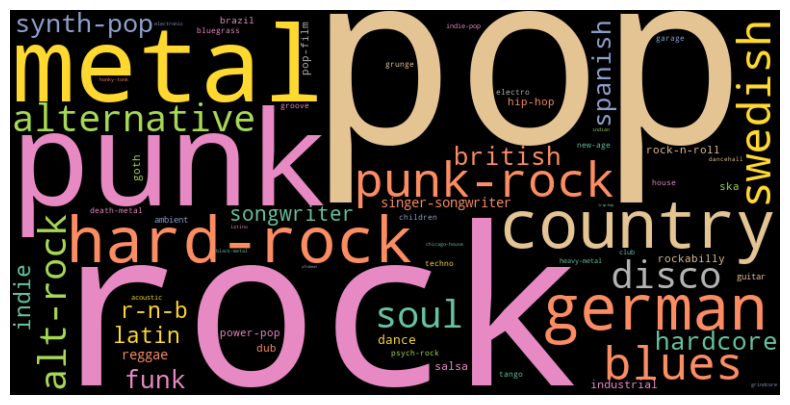

In [245]:
genre_counts = genre_counts.sort_values(by='count', ascending=False)
genre_counts_dict = genre_counts.set_index('genres')['count'].to_dict()
cloud = wordcloud.WordCloud(width=800, height=400, background_color='black',colormap='Set2').generate_from_frequencies(genre_counts_dict)
plt.figure(figsize=(10, 5))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word Cloud for Genres per Year

In [246]:
# Count occurrences of genres per year
genre_counts_per_year = final_genres.groupby(['year', 'genres']).size().reset_index(name='count')

# Get the top 50 genres per year
top50_genres_per_year = genre_counts_per_year.groupby('year').apply(lambda x: x.nlargest(50, 'count')).reset_index(drop=True)

# Create a new DataFrame to store the results
genres_count_by_year = pd.DataFrame(top50_genres_per_year)
genres_count_by_year

,year,genres,count
0,1980,pop,9279
1,1980,rock,6768
2,1980,punk,2050
3,1980,country,1363
4,1980,disco,1284
...,...,...,...
495,1989,acoustic,213
496,1989,bluegrass,182
497,1989,garage,179
498,1989,club,169


In [247]:
genres_year_pivot = genres_count_by_year.pivot(index='year', columns='genres', values='count') \
.fillna(0) \
.reset_index() \
.rename_axis(None, axis=1)

There are several null values after pivot the dataframe, because some genres doesn't exist in some years. But it doesn't matter for our purpose

In [248]:
genres_year_pivot

,year,acoustic,afrobeat,alt-rock,alternative,ambient,black-metal,bluegrass,blues,brazil,...,salsa,singer-songwriter,ska,songwriter,soul,spanish,swedish,synth-pop,tango,techno
0,1980,55.0,30.0,473.0,524.0,45.0,0.0,92.0,945.0,42.0,...,327.0,391.0,290.0,391.0,1040.0,306.0,779.0,423.0,222.0,81.0
1,1981,103.0,0.0,548.0,568.0,98.0,0.0,95.0,830.0,112.0,...,236.0,401.0,113.0,401.0,1050.0,148.0,907.0,624.0,86.0,128.0
2,1982,43.0,33.0,409.0,420.0,100.0,0.0,65.0,781.0,61.0,...,255.0,719.0,242.0,719.0,1013.0,429.0,771.0,646.0,59.0,96.0
3,1983,90.0,0.0,483.0,517.0,150.0,0.0,108.0,728.0,170.0,...,217.0,411.0,115.0,411.0,783.0,418.0,824.0,692.0,86.0,107.0
4,1984,74.0,0.0,641.0,665.0,111.0,0.0,129.0,718.0,117.0,...,221.0,407.0,147.0,407.0,669.0,612.0,741.0,841.0,87.0,163.0
5,1985,0.0,0.0,632.0,678.0,160.0,68.0,0.0,476.0,167.0,...,333.0,404.0,158.0,404.0,555.0,689.0,776.0,829.0,92.0,151.0
6,1986,0.0,0.0,859.0,913.0,264.0,0.0,0.0,653.0,270.0,...,197.0,413.0,156.0,413.0,546.0,640.0,676.0,738.0,130.0,139.0
7,1987,0.0,0.0,1212.0,1234.0,218.0,0.0,196.0,807.0,283.0,...,247.0,351.0,265.0,351.0,580.0,793.0,810.0,714.0,194.0,0.0
8,1988,0.0,0.0,1065.0,1213.0,166.0,0.0,198.0,1073.0,199.0,...,347.0,499.0,344.0,499.0,693.0,802.0,853.0,537.0,161.0,0.0
9,1989,213.0,0.0,1112.0,1160.0,221.0,0.0,182.0,1496.0,314.0,...,437.0,361.0,397.0,361.0,777.0,1000.0,1115.0,682.0,0.0,0.0


In [249]:
genres_by_year = genres_year_pivot.set_index('year')

In [250]:
genres_by_year = genres_by_year.to_dict('index')

In [251]:
def wc(df):
    clear_output(wait=True)
    cloud = wordcloud.WordCloud(width=700, height=400, background_color='black').generate_from_frequencies(df)
    plt.figure(figsize=(9, 9))
    plt.imshow(cloud)
    plt.tight_layout()
    plt.axis("off")

In [252]:
dropdown = widgets.Dropdown(options = genres_by_year,
                                value=genres_by_year[1980],
                                 description= "year" )

widgets.interact(wc,df=dropdown)

interactive(children=(Dropdown(description='year', options={1980: {'acoustic': 55.0, 'afrobeat': 30.0, 'alt-ro…

<function __main__.wc(df)>

#### Popularity of Artists in Word Cloud

split artists

In [253]:
df_artists = df_split_genres.sort_values('popularity',ascending=False).drop_duplicates(["name","year"],keep="first")

In [254]:
df_artists["artists"].unique()

array(['a-ha', 'The Police', 'Bon Jovi', ..., 'Clear Rats',
       'The Machismos', 'The Hot Rod Gang'], dtype=object)

In [255]:
df_artists['artists'] = df_artists['artists'].str.split(',')
df_split_artists = df_artists.explode('artists')

In [256]:
df_split_artists["artists"].unique()

array(['a-ha', 'The Police', 'Bon Jovi', ..., 'Clear Rats',
       'The Machismos', 'The Hot Rod Gang'], dtype=object)

In [257]:
df_artist_popularity_per_year = (
    df_split_artists.groupby(['year', 'artists'])
    .agg({'popularity': 'sum'})
    .groupby('year', as_index=False)
    .apply(lambda group: group.nlargest(10, columns='popularity'))
    .reset_index(level=0, drop=True)
    .reset_index()
    .pivot(index='year', columns='artists', values='popularity')
    .fillna(0)
    .astype(float)
    .to_dict(orient='index')
)

In [258]:
dropdown = widgets.Dropdown(options = df_artist_popularity_per_year,
                                value=df_artist_popularity_per_year[1980],
                                 description= "year" )

widgets.interact(wc,df=dropdown)

interactive(children=(Dropdown(description='year', options={1980: {' Jr.': 0.0, '5 Geschwister': 0.0, 'ABBA': …

<function __main__.wc(df)>

Top 20 Popularity Artists in Word Cloud

In [259]:
def wordcloud_artists(counts):
    cloud = wordcloud.WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(counts)
    plt.figure(figsize=(18,15))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [260]:
artists_popularity = df_split_artists.groupby("artists", as_index=False)["popularity"].sum()

In [261]:
top20 = artists_popularity.sort_values(['popularity'],ascending=False).head(20)


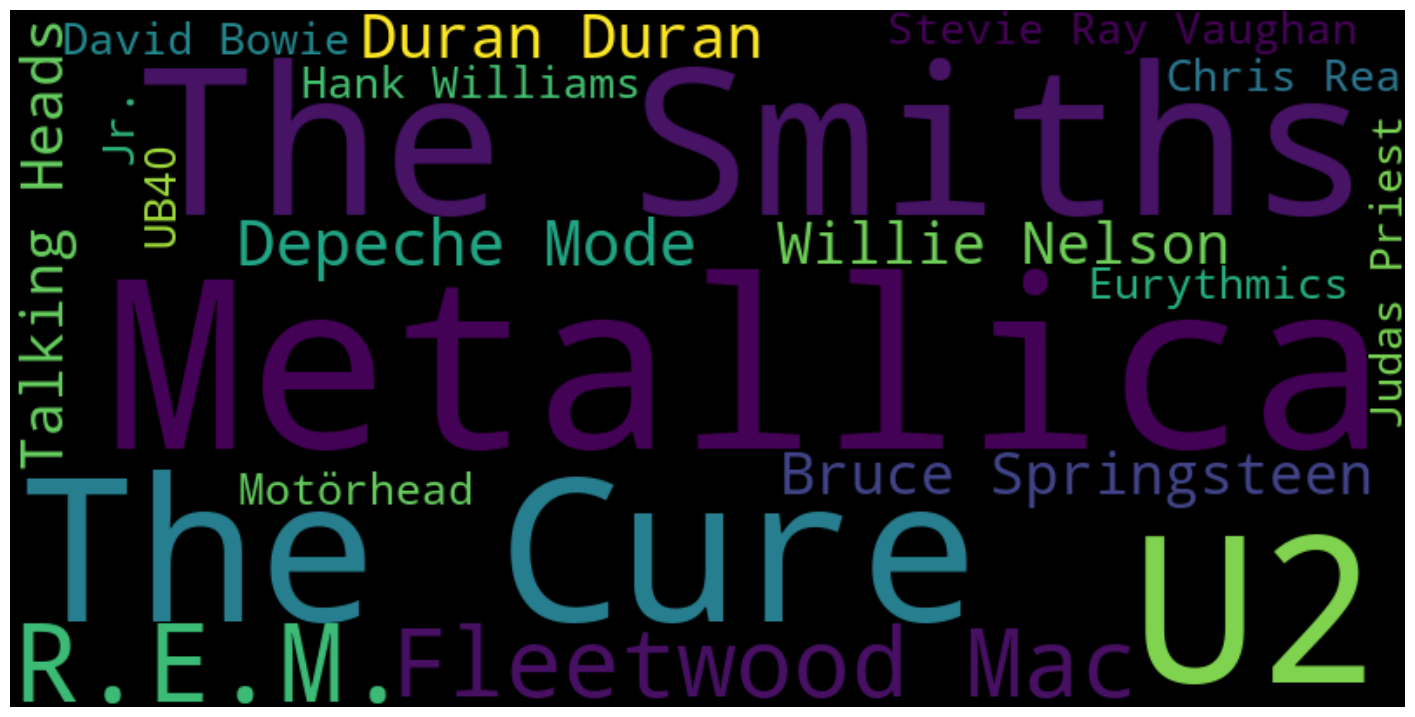

In [262]:
top20_tuples = [tuple(x) for x in top20.values]
wordcloud_artists(dict(top20_tuples))

### Chart Score

In [263]:
df_chart_power = by_isrc.copy()

sum of chart score per artists

In [264]:
avg_chart = df_chart_power.groupby("artists")["chart_power"].sum().reset_index()

Top20 Chart Score Artists in Word Cloud

In [265]:
top20_chart = avg_chart.sort_values(['chart_power'],ascending=False).head(20)

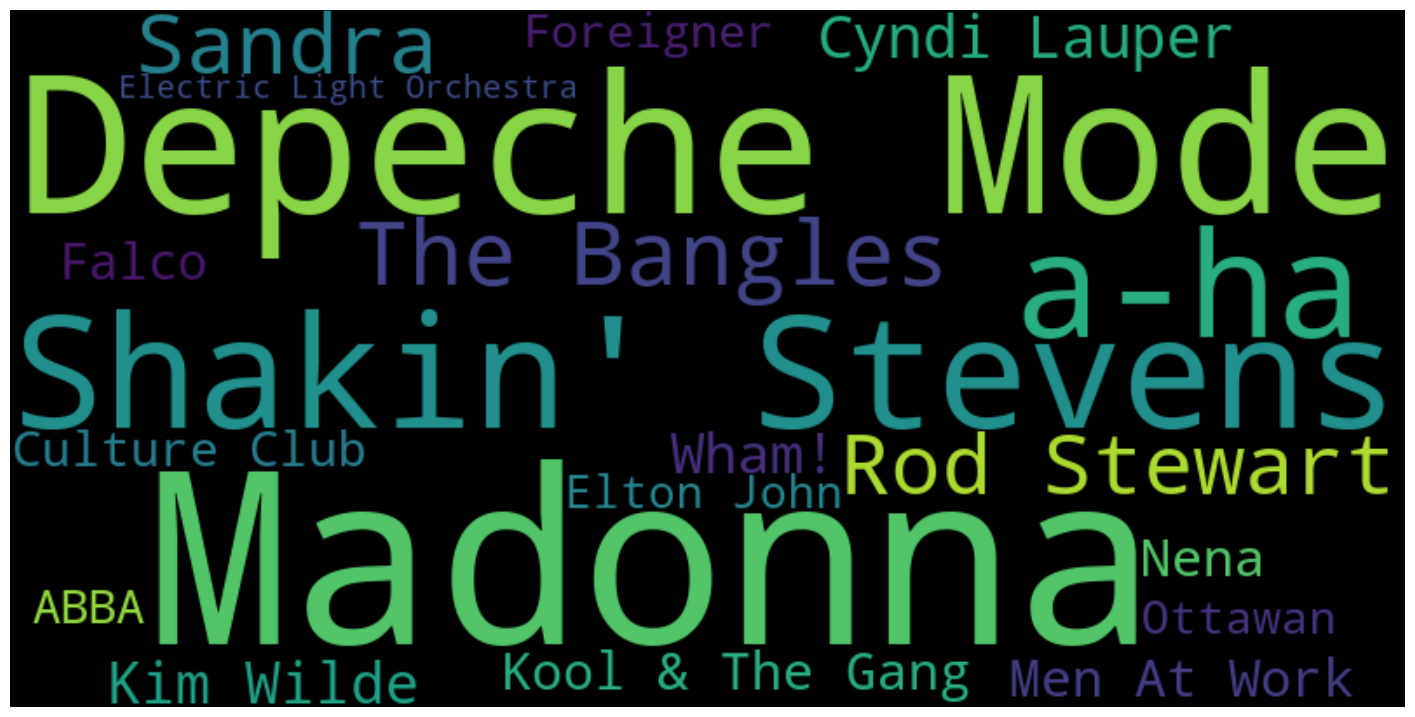

In [266]:
top20_chart_tuples = [tuple(x) for x in top20_chart.values]
wordcloud_artists(dict(top20_chart_tuples))

Merge data with popularity and chart score

In [267]:
merge = artists_popularity.merge(avg_chart, on='artists',how="outer")
merge['popularity'] = merge['popularity'].fillna(0) #fill nan value to 0
merge['chart_power'] = merge['chart_power'].fillna(0)
merge.sort_values('popularity',ascending=False)

,artists,popularity,chart_power
8260,Metallica,7887.0,0.0
12771,The Smiths,5760.0,0.0
13326,U2,5715.0,919.0
12362,The Cure,5441.0,0.0
10055,R.E.M.,5148.0,0.0
...,...,...,...
23757,"Franz Schubert,Texas Boys Choir",0.0,0.0
23758,"Franz Schubert,Thalia-Schrammeln",0.0,0.0
23759,"Franz Schubert,The Boptones",0.0,0.0
23760,"Franz Schubert,The Concords",0.0,0.0


In [268]:
merge.rename({"chart_power":"chart_score"},axis=1, inplace=True)
merge

,artists,popularity,chart_score
0,Ance,79.0,0.0
1,And His Rainbow Ranch Boys,29.0,0.0
2,Cambridge,7.0,0.0
3,Das,0.0,0.0
4,Jane,146.0,0.0
...,...,...,...
49115,조영남,0.0,0.0
49116,패티김,0.0,0.0
49117,"﻿Joseph Chabanceau de la Barre,Henri Ledroit,M...",0.0,0.0
49118,"﻿Joseph Chabanceau de la Barre,Konrad Junghane...",0.0,0.0


In [269]:
merge.sort_values(['chart_score'],ascending=False).head(20)

,artists,popularity,chart_score
7658,Madonna,2785.0,24442.0
2885,Depeche Mode,5039.0,19890.0
11209,Shakin' Stevens,1930.0,17255.0
14080,a-ha,3439.0,15372.0
12252,The Bangles,1.0,13935.0
10974,Sandra,1058.0,12075.0
10610,Rod Stewart,2736.0,12012.0
2463,Cyndi Lauper,1411.0,11378.0
6575,Kim Wilde,2150.0,11016.0
13768,Wham!,1598.0,10628.0


Top 20 popular Artists from Spotify vs. from Chart Score

In [270]:
top20_popu = merge.nlargest(20, 'popularity').reset_index(drop=True)
top20_score = merge.nlargest(20, 'chart_score').reset_index(drop=True)

In [271]:
top20_popu

,artists,popularity,chart_score
0,Metallica,7887.0,0.0
1,The Smiths,5760.0,0.0
2,U2,5715.0,919.0
3,The Cure,5441.0,0.0
4,R.E.M.,5148.0,0.0
5,Fleetwood Mac,5072.0,2583.0
6,Depeche Mode,5039.0,19890.0
7,Duran Duran,4474.0,5465.0
8,Bruce Springsteen,4340.0,1927.0
9,Willie Nelson,4314.0,0.0


In [272]:
top20_score

,artists,popularity,chart_score
0,Madonna,2785.0,24442.0
1,Depeche Mode,5039.0,19890.0
2,Shakin' Stevens,1930.0,17255.0
3,a-ha,3439.0,15372.0
4,The Bangles,1.0,13935.0
5,Sandra,1058.0,12075.0
6,Rod Stewart,2736.0,12012.0
7,Cyndi Lauper,1411.0,11378.0
8,Kim Wilde,2150.0,11016.0
9,Wham!,1598.0,10628.0


In [273]:
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Top 20 Popularity Artists', 'Top 20 Chart Score Artists'))

# Add bar trace for top popularity artists
fig.add_trace(go.Bar(x=top20_popu['popularity'], y=top20_popu['artists'],
                     orientation='h', name='Popularity Artists'), row=1, col=1)

# Add bar trace for top chart score artists
fig.add_trace(go.Bar(x=top20_score['chart_score'], y=top20_score['artists'],
                     orientation='h', name='Chart Score Artists'), row=1, col=2)

# Update layout
fig.update_layout(#title='Top 20 Artists',
                  yaxis=dict(autorange="reversed"),
                  yaxis2=dict(autorange="reversed"),
                    width=1600,  # Width in pixels
                    height=600)

# Show the plot
fig.show()

In [274]:
"""scaler = preprocessing.MinMaxScaler()
merge[['popularity', 'chart_score']] = scaler.fit_transform(merge[['popularity', 'chart_score']])"""

"scaler = preprocessing.MinMaxScaler()\nmerge[['popularity', 'chart_score']] = scaler.fit_transform(merge[['popularity', 'chart_score']])"

Top10 Artists who had low chart score(<50) but has now high popularity

In [275]:
"""def barplot(col1,col2,title):

    fig = go.Figure(data=go.Bar(
    x=col1,
    y=col2,
    orientation='h'
    ))

    fig.update_layout(
        title = title,
        xaxis=dict(
            range=[0.1, max(col1)+0.1],  # Set the range of the x-axis
            dtick=0.2  # Set the tick interval of the x-axis
        )
    )

    # Show the bar chart
    fig.show()"""

"def barplot(col1,col2,title):\n\n    fig = go.Figure(data=go.Bar(\n    x=col1,\n    y=col2,\n    orientation='h'\n    ))\n\n    fig.update_layout(\n        title = title,\n        xaxis=dict(\n            range=[0.1, max(col1)+0.1],  # Set the range of the x-axis\n            dtick=0.2  # Set the tick interval of the x-axis\n        )\n    )\n\n    # Show the bar chart\n    fig.show()"

In [276]:
"""merge['difference_1'] = merge['popularity'].sub(merge['chart_score'])
top_diff_1= merge.nlargest(10, 'difference_1')
top_diff_1"""

"merge['difference_1'] = merge['popularity'].sub(merge['chart_score'])\ntop_diff_1= merge.nlargest(10, 'difference_1')\ntop_diff_1"

In [277]:
low_chart_score = merge[merge['chart_score'] < 50]
sorted_low_chart_score = low_chart_score.sort_values(by='popularity', ascending=False)
top_10_low_chart = sorted_low_chart_score.head(10)
top_10_low_chart

,artists,popularity,chart_score
8260,Metallica,7887.0,0.0
12771,The Smiths,5760.0,0.0
12362,The Cure,5441.0,0.0
10055,R.E.M.,5148.0,0.0
13832,Willie Nelson,4314.0,0.0
12059,Talking Heads,4193.0,0.0
11766,Stevie Ray Vaughan,4161.0,0.0
8612,Motörhead,4070.0,0.0
5,Jr.,3964.0,0.0
4699,Hank Williams,3947.0,0.0


In [278]:
def barplot(df,label,col1,col2,title):
    fig = px.bar(
        data_frame = df,
        x = label,
        y = [col1,col2],
        opacity = 0.9,
        orientation = "v",
        barmode = 'group',
        title = title)
    fig.show()

In [279]:
barplot(top_10_low_chart,top_10_low_chart.artists,top_10_low_chart.chart_score,top_10_low_chart.popularity,"Top10 Artists who had < 50 chart score but has now high popularity")

In [280]:
"""barplot(top_10_low_chart['difference_1'],top_10_low_chart['artists'],"Top10 Artists who had < 50 chart score but has now high popularity")"""

'barplot(top_10_low_chart[\'difference_1\'],top_10_low_chart[\'artists\'],"Top10 Artists who had < 50 chart score but has now high popularity")'

Top10 Artists who had high chart score but has now low popularity(<5)

In [281]:
"""merge['difference_2'] = merge['chart_score'].sub(merge['popularity'])
top_diff_2 = merge.nlargest(10, 'difference_2')
top_diff_2"""

"merge['difference_2'] = merge['chart_score'].sub(merge['popularity'])\ntop_diff_2 = merge.nlargest(10, 'difference_2')\ntop_diff_2"

In [282]:
low_pop = merge[merge['popularity'] < 10]
sorted_low_pop = low_pop.sort_values(by='chart_score', ascending=False)
top_10_low_pop = sorted_low_pop.head(10)
top_10_low_pop

,artists,popularity,chart_score
12252,The Bangles,1.0,13935.0
40142,Ottawan,0.0,7525.0
11207,Shakatak,1.0,4425.0
7443,Louis Armstrong,0.0,1635.0
44876,Supertramp,0.0,1633.0
46532,Vanessa Paradis,0.0,1266.0
45850,Tony Esposito,0.0,1116.0
22238,F.R. David,0.0,1001.0
13800,Will Downing,3.0,870.0
38486,Mezzoforte,0.0,782.0


In [283]:
barplot(top_10_low_pop,top_10_low_pop.artists,top_10_low_pop.chart_score,top_10_low_pop.popularity,"Top10 Artists who had high chart score but has now popularity < 10")

Top10 Songs from Popularity

In [284]:
tracks = df_chart_power[["name", "artists", "popularity",'chart_power']].copy()
tracks = tracks.sort_values('popularity',ascending=False).drop_duplicates(["name"],keep="first") 
#drop duplicated songs because there are some songs with same name but difference isrc and popularity
#keep only the highest popularity of these songs

In [285]:
tracks['popularity'] = tracks['popularity'].fillna(0) #fill nan value to 0
tracks['chart_power'] = tracks['chart_power'].fillna(0) #fill nan value to 0
tracks.rename({"chart_power":"chart_score"},axis=1, inplace=True)

In [286]:
top10_tracks_popularity = tracks.nlargest(10, 'popularity')
top10_tracks_popularity

,name,artists,popularity,chart_score
134738,Every Breath You Take,The Police,87,1419.0
413123,Take on Me,a-ha,87,1723.0
146452,I'm Still Standing,Elton John,86,1185.0
377257,Livin' On A Prayer,Bon Jovi,86,1112.0
172181,Running Up That Hill (A Deal With God),Kate Bush,85,0.0
399341,Africa,TOTO,85,1163.0
6865,Back In Black,AC/DC,85,0.0
362261,Welcome To The Jungle,Guns N' Roses,84,0.0
334501,Summer Of '69,Bryan Adams,84,0.0
147023,Sweet Dreams (Are Made of This) - Remastered,"Eurythmics,Annie Lennox,Dave Stewart",84,0.0


In [287]:
barplot(top10_tracks_popularity,top10_tracks_popularity.name,top10_tracks_popularity.chart_score,top10_tracks_popularity.popularity,"Top10 Songs from Popularity")

Top10 Songs from Chart Score

In [288]:
top10_tracks_chart = tracks.nlargest(10, 'chart_score')
top10_tracks_chart

,name,artists,popularity,chart_score
69168,Sun of Jamaica,Goombay Dance Band,58,3255.0
365104,Johnny And Mary,Robert Palmer,61,3157.0
108995,D.I.S.C.O.,Ottawan,48,2737.0
44956,Skandal im Sperrbezirk,Spider Murphy Gang,61,2617.0
157184,Kids In America,Kim Wilde,70,2586.0
416630,Bobby Brown,Frank Zappa,0,2570.0
377129,Fade To Grey,Visage,64,2518.0
395736,Down Under,Men At Work,75,2488.0
58506,Nur geträumt,Nena,60,2479.0
294728,Super Trouper,ABBA,73,2469.0


In [289]:
barplot(top10_tracks_chart,top10_tracks_chart.name,top10_tracks_chart.chart_score,top10_tracks_chart.popularity,"Top10 Songs from Chart Power")